In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.__version__

'1.19.2'

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [3]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [4]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h

In [5]:
def numerical_diff_median(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [6]:
def f(x):
    return 0.01*x**2 + 0.1*x

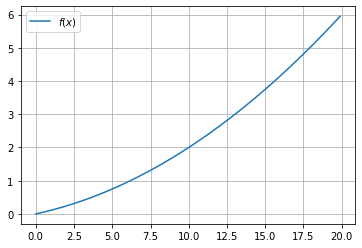

In [7]:
x = np.arange(0.0, 20.0, 0.1)
y = f(x)
plt.plot(x, y, label='$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
numerical_diff_median(f, 5)

0.1999999999990898

In [9]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [10]:
def f2(x):
    return x[0]**2 + x[1]**2

In [11]:
numerical_gradient(f2, np.array([3.0, 4.0]))

array([6., 8.])

In [14]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [15]:
x = np.array([-3.0, 4.0])
gradient_descent(f2, x)

array([-0.39785867,  0.53047822])

In [16]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [17]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return x @ self.W

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [18]:
net = simpleNet()
net.W

array([[-0.42556202, -0.07296092, -0.40046733],
       [-0.89630197, -1.51740648,  0.42229394]])

In [19]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([-1.06200899, -1.40944238,  0.13978414])

In [20]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.41413844788633164

In [21]:
x.shape, x[0], x[1], x.size

((2,), 0.6, 0.9, 2)

In [22]:
from functions import *
from gradient import *

In [44]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = x @ W1 + b1
        z1 = sigmoid(a1)
        a2 = z1 @ W2 + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [45]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net

In [25]:
x = np.random.randn(100, 784)
net.predict(x).shape

(100, 10)

In [26]:
x = np.random.randn(100, 784)
t = np.random.randn(100, 10)

net.numerical_gradient(x, t).shape

3.34993979e-03,  9.39262045e-03,
          6.20790164e-03, -1.07199247e-02, -1.62092478e-02,
         -6.41378503e-03,  1.75495000e-02,  6.29952774e-03,
         -5.50213537e-03],
        [-3.75483038e-03,  1.38914505e-03,  1.01495334e-02,
          3.61009642e-03, -9.78740960e-03, -1.11035315e-02,
         -6.19486598e-03,  1.69831462e-02,  6.82448189e-03,
         -8.11576536e-03],
        [-2.39981255e-03, -1.81644424e-03,  7.84959822e-03,
          5.54801369e-03, -1.10909337e-02, -1.14750944e-02,
         -6.38674389e-03,  1.36666400e-02,  7.35288477e-03,
         -1.24810778e-03],
        [-1.92411463e-03,  1.90440711e-03,  7.99278483e-03,
          4.01587334e-03, -1.66380964e-02, -1.19383853e-02,
         -5.14975567e-03,  1.79677724e-02,  5.58243886e-03,
         -1.81292438e-03],
        [-4.07637240e-03,  1.85991639e-03,  1.03590508e-02,
          7.56324145e-03, -1.17237756e-02, -1.41361440e-02,
         -1.05415834e-02,  1.67582554e-02,  8.00106250e-03,
         -4.0636509

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

x, t = load_digits(return_X_y=True)
x.shape, t.shape

((1797, 64), (1797,))

In [31]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=.2, random_state=0)
x_train.shape, t_train.shape, x_test.shape, t_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [64]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 300
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=64, hidden_size=50, output_size=10)

iter_per_epoch = 10 #max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # print(x_batch.shape, t_batch.shape)

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print(f'{i} iter, loss: {loss}')

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'train acc:{train_acc}, test acc: {test_acc}')

0 iter, loss: 2.2790031407881806
train acc:0.1022964509394572, test acc: 0.09722222222222222
1 iter, loss: 2.2873428054915945
2 iter, loss: 2.284729845891524
3 iter, loss: 2.2795571829007115
4 iter, loss: 2.283144968642283
5 iter, loss: 2.247851954408198
6 iter, loss: 2.284713873600234
7 iter, loss: 2.2664864118929064
8 iter, loss: 2.2679233910515713
9 iter, loss: 2.2509615050804936
10 iter, loss: 2.2402629788500725
train acc:0.18302018093249825, test acc: 0.18888888888888888
11 iter, loss: 2.2579160926272857
12 iter, loss: 2.2474815433316495
13 iter, loss: 2.204975819128091
14 iter, loss: 2.2224584971224903
15 iter, loss: 2.220056167475381
16 iter, loss: 2.2003460055988757
17 iter, loss: 2.19669778242542
18 iter, loss: 2.2009099283558977
19 iter, loss: 2.151914591878065
20 iter, loss: 2.165573258519423
train acc:0.5149617258176757, test acc: 0.4222222222222222
21 iter, loss: 2.1065866030903795
22 iter, loss: 2.1307506366301547
23 iter, loss: 2.0937823247219725
24 iter, loss: 2.0909300

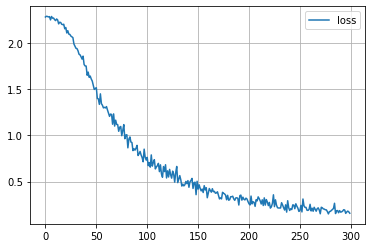

In [65]:
x = [x for x in range(iters_num)]
y = [train_loss_list[i] for i in x]
plt.plot(x, y, label='loss')
plt.legend()
plt.grid(True)
plt.show()

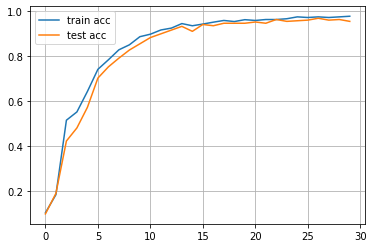

In [66]:
x = [x for x in range(len(train_acc_list))]
plt.plot(x, [train_acc_list[i] for i in x], label='train acc')
plt.plot(x, [test_acc_list[i] for i in x], label='test acc')
plt.legend()
plt.grid(True)
plt.show()